### Main file

In [1]:
import numpy as np 
from tools.srbm import *           # !!! Importing the experimental SRBM model !!!
from tools.functions import *
import matplotlib.pyplot as plt
from brian2tools import *

date_str = str(datetime.datetime.now())[0:10]
date_time_str = str(datetime.datetime.now())[0:10]+"_"+str(datetime.datetime.now())[11:16]


/opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Some parameters for training the SRBM - the others are in paramters_main.py

t_ref = 0.004 * second
dcmt = 35
T = dcmt*t_ref
init_delay=dcmt*t_ref
delay=0*ms

n_samples = 1000

# Loading the data
data_finnegan = load_data("data_finnegan_0.2_0.05_5_200_50")

train_test_data = train_test_split_finnegan(data_finnegan, 0.9)

train_test_data[0].shape

Data loaded from data/data_finnegan_0.2_0.05_5_200_50.npy


(50, 18, 200)

Hamming distance: 74.0
Percent match: 0.63


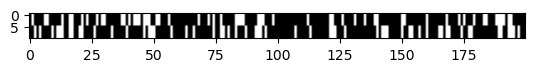

In [3]:
a = train_test_data[0][1, 2]
b = train_test_data[0][0, 1]
print("Hamming distance: ", round(hamming_distance(a, b), 2), sep="")
print("Percent match: ", round(percent_match(a, b), 2), sep="")
imshow(np.row_stack((a, a, a, a, a,
                     b, b, b, b, b)), 
                     cmap='gray')

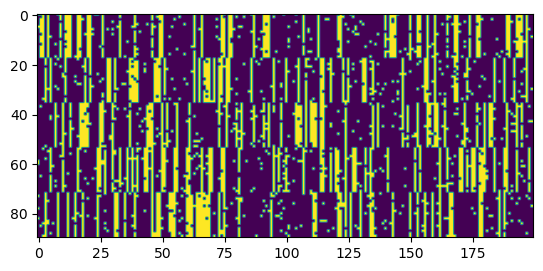

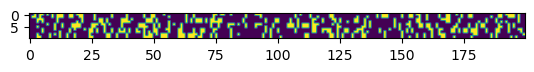

In [4]:
idx_first_batch = np.arange(0, 50, 10)           #[0, 10, 20 30, 40]

first_batch_train = train_test_data[0][idx_first_batch]
first_batch_test = train_test_data[1][idx_first_batch]
imshow(np.row_stack(first_batch_train))
plt.show()
imshow(np.row_stack(first_batch_test))
plt.show()

In [5]:
first_batch_train.shape

(5, 18, 200)

In [6]:
np.random.choice(np.arange(0, first_batch_test.shape[2]), first_batch_test.shape[2], replace=False)

array([ 88,  53,   2, 159,  56,  69,  91,  54, 109, 198,   3, 163, 178,
       173,  74,  82, 158, 121,  59,  34, 122,  80, 141, 117, 116, 152,
        15, 179, 114,  50, 155,  77, 128,  16, 120,   5,  21,  40, 196,
       105, 106, 137, 124, 170,  26, 113, 104,  14, 185, 142,  84, 108,
         1, 194,  35, 162, 134, 154, 112,  23, 181,  52, 150,  33,  12,
        63,  45, 119, 125, 160, 107, 123, 195,  22, 101, 175, 180, 197,
        75,  68, 111,  61, 147, 102, 199, 172,  47,  24,  51, 176,  60,
       182, 186,  65,  71, 184, 148, 126,  46, 129, 189,  17, 171,  19,
        83,  70, 183, 153, 144, 191,  57,  92, 149,   0,  27,  87,  81,
       103,  29, 100,  10,   6,   7,  86, 164,  55, 133,  95,   9, 166,
       177,  66, 157,  42, 168,  38,  85, 169, 145, 143,   8, 146,  48,
       188, 165,  30,  18,  99,  37, 130,  44, 115,  11, 127,  41,  98,
        73,  62,  64, 132, 190,  39,  94,  31,  76,  32, 118,  28,  97,
        67, 140,  96,  36, 193, 151,  90, 138, 131,  43,  89,  9

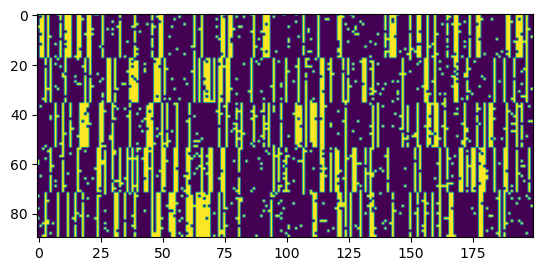

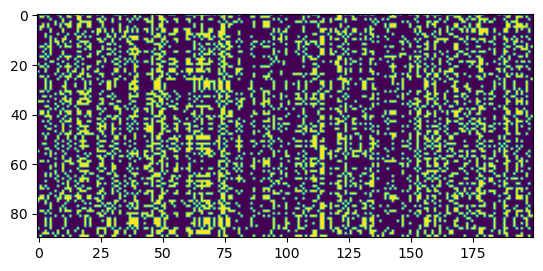

In [7]:
bound_data(first_batch_train, min_p = .00001, max_p = .98)
bound_data(first_batch_test, min_p = .00001, max_p = .98)

fist_batch_concatenated = np.concatenate(first_batch_train)[np.random.choice(np.arange(0, np.concatenate(first_batch_train).shape[0]), np.concatenate(first_batch_train).shape[0], replace=False)]

imshow(np.concatenate(first_batch_train))
plt.show()
imshow(fist_batch_concatenated)

In [59]:
Ids = clamped_input_transform(fist_batch_concatenated, min_p = 1e-4, max_p = .95)[:10]

In [60]:
Ids = np.row_stack((np.repeat(0, 200), Ids, np.repeat(0, 200), np.repeat(0, 200), np.repeat(0, 200)))

In [61]:

""" # Preparing the data
sequence_data = get_data(n_samples=n_samples, min_p = .00001, max_p = .98, binary = True, seed=0, 
                           load_from_drive=False, data=train_test_sequence_data, num_classes = range(50))
 """
# Create the parameters for the SRBM
W, b_v, b_c, b_h = create_rbm_parameters(N_v = N_v, N_c = N_c, N_h = N_h)

""" n_patterns = 100
on_off_ratio = 1
Ids, labels = create_Id_pattern(n_patterns, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, beta_parameter = beta_parameter, 
                        on_off_ratio = on_off_ratio, seed = 14, data_mult = 1, class_mult = 1, allowed_labels = [0, 1, 2, 3, 4])
 """
# Create timepoints for classificaiton
timepoints, t_sim, time_points_dict = create_timepoints(Ids, init_delay, delay, T)

sim_time = t_sim / (dcmt*t_ref)

In [62]:
out = main(W, b_v, b_c, b_h, Id = Ids, sim_time = sim_time, t_sim = t_sim, dorun = True, n_classes = 5, 
            monitors = True, display=False) # set display to false if no lables are used 
Mh, Mv, Mc= out['Mh'], out['Mv'], out['Mc']
locals().update(out)

INFO:root:building '_cython_magic_c8e990deb8264372b7c54d408a1d1b7f' extension
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/include -arch arm64 -fPIC -O2 -isystem /opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/include -arch arm64 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -isystem /opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/include -D_FORTIFY_SOURCE=2 -isystem /opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/include -I/opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/include -I/opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/lib/python3.9/site-packages/numpy/core/include -I/opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/lib/python3.9/site-packages/brian2/synapses -I/opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/include/python3.9 -c /Users/daniel/Library/Caches/cython/brian_extensions/_cython_

3.5938808917999268


In [63]:
# Prepare weights and biases
W = np.array(Srs.w).reshape(N_v+N_c, N_h)*beta_parameter
Wvh=W[:N_v,:]
Wch=W[N_v:,:]
mBv = np.array(Sbv.w)*beta_parameter*tau_rec*bias_input_rate
mBh = np.array(Sbh.w)*beta_parameter*tau_rec*bias_input_rate
b_c = mBv[N_v:(N_v+N_c)]
b_v = mBv[:N_v]
b_h = mBh
mB = np.concatenate([mBv,mBh])

In [79]:
# based on a custum id creation with an on_off_ratio of 1 (for each image presented, the next timepoint nothing will be presented once), 
# every uneven timepoints are times where stimuli are shown and every even timepoints times where the network tries to hold the state. 



time_point = 14

orig = spike_histogram(Mv, t_start=time_points_dict["T"+ str(time_point)+"_s"], t_stop=time_points_dict["T"+ str(time_point)+"_e"]).T[1]
reconstr = spike_histogram(Mv, t_start=time_points_dict["T"+ str(time_point)+"_s"], t_stop=time_points_dict["T"+ str(time_point)+"_e"]).T[1]

imshow(orig.reshape(10, 20))

KeyError: 'T14_s'

Reconstruct

WARNING    /opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/lib/python3.9/site-packages/brian2tools/plotting/data.py:59: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  axes.plot(spike_times/time_unit, spike_indices, '.', **kwds)
 [py.warnings]
  axes.plot(spike_times/time_unit, spike_indices, '.', **kwds)



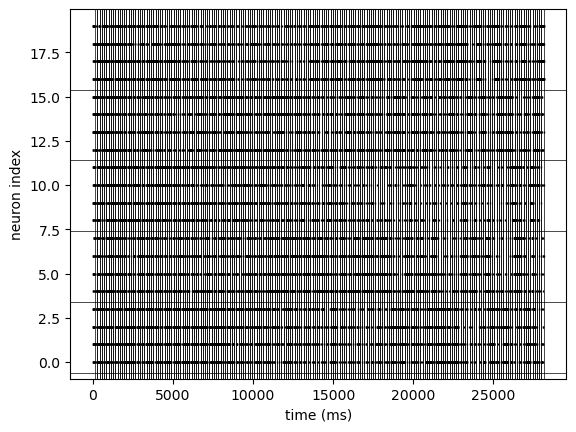

In [ ]:
plot_raster(Mc.i, Mc.t, markersize=2, marker='|', color='k', mew=1)
for i in range(n_classes):
    axhline(-0.6+float(i)*4, color='k', linewidth=0.5)
color_list = ['k']
col_cnt = 0
for i in timepoints:
    axvline(i/second*1000, color=color_list[col_cnt%len(color_list)], linewidth=0.5)
    col_cnt += 1

In [ ]:
time_point = 100

frequency_classification(Mc, n_classes, n_c_unit, t_ref=t_ref, t_start=time_points_dict["T"+ str(time_point)+"_s"], t_end=time_points_dict["T"+ str(time_point)+"_e"]*second, delay = 10)

p-value: 0.26. Confidence: Low


1

WARNING    /opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/lib/python3.9/site-packages/brian2tools/plotting/data.py:59: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  axes.plot(spike_times/time_unit, spike_indices, '.', **kwds)
 [py.warnings]
  axes.plot(spike_times/time_unit, spike_indices, '.', **kwds)



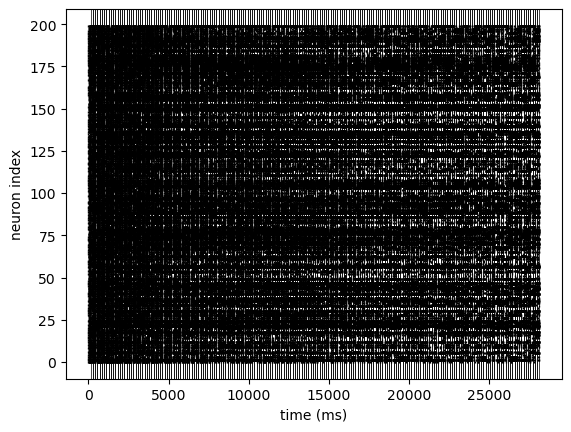

In [ ]:
plot_raster(Mv.i, Mv.t, markersize=2,marker='|', color='k', mew=1)
col_cnt = 0
for i in timepoints:
    axvline(i/second*1000, color=color_list[col_cnt%len(color_list)], linewidth=0.5)
    col_cnt += 1